In [36]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
# image=Image.open('data/page_01.jpg')
# image.load()

In [37]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

# Binarization

In [22]:
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [23]:
def showImg(img_name):
    
    cv2.imshow('original', img_name)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

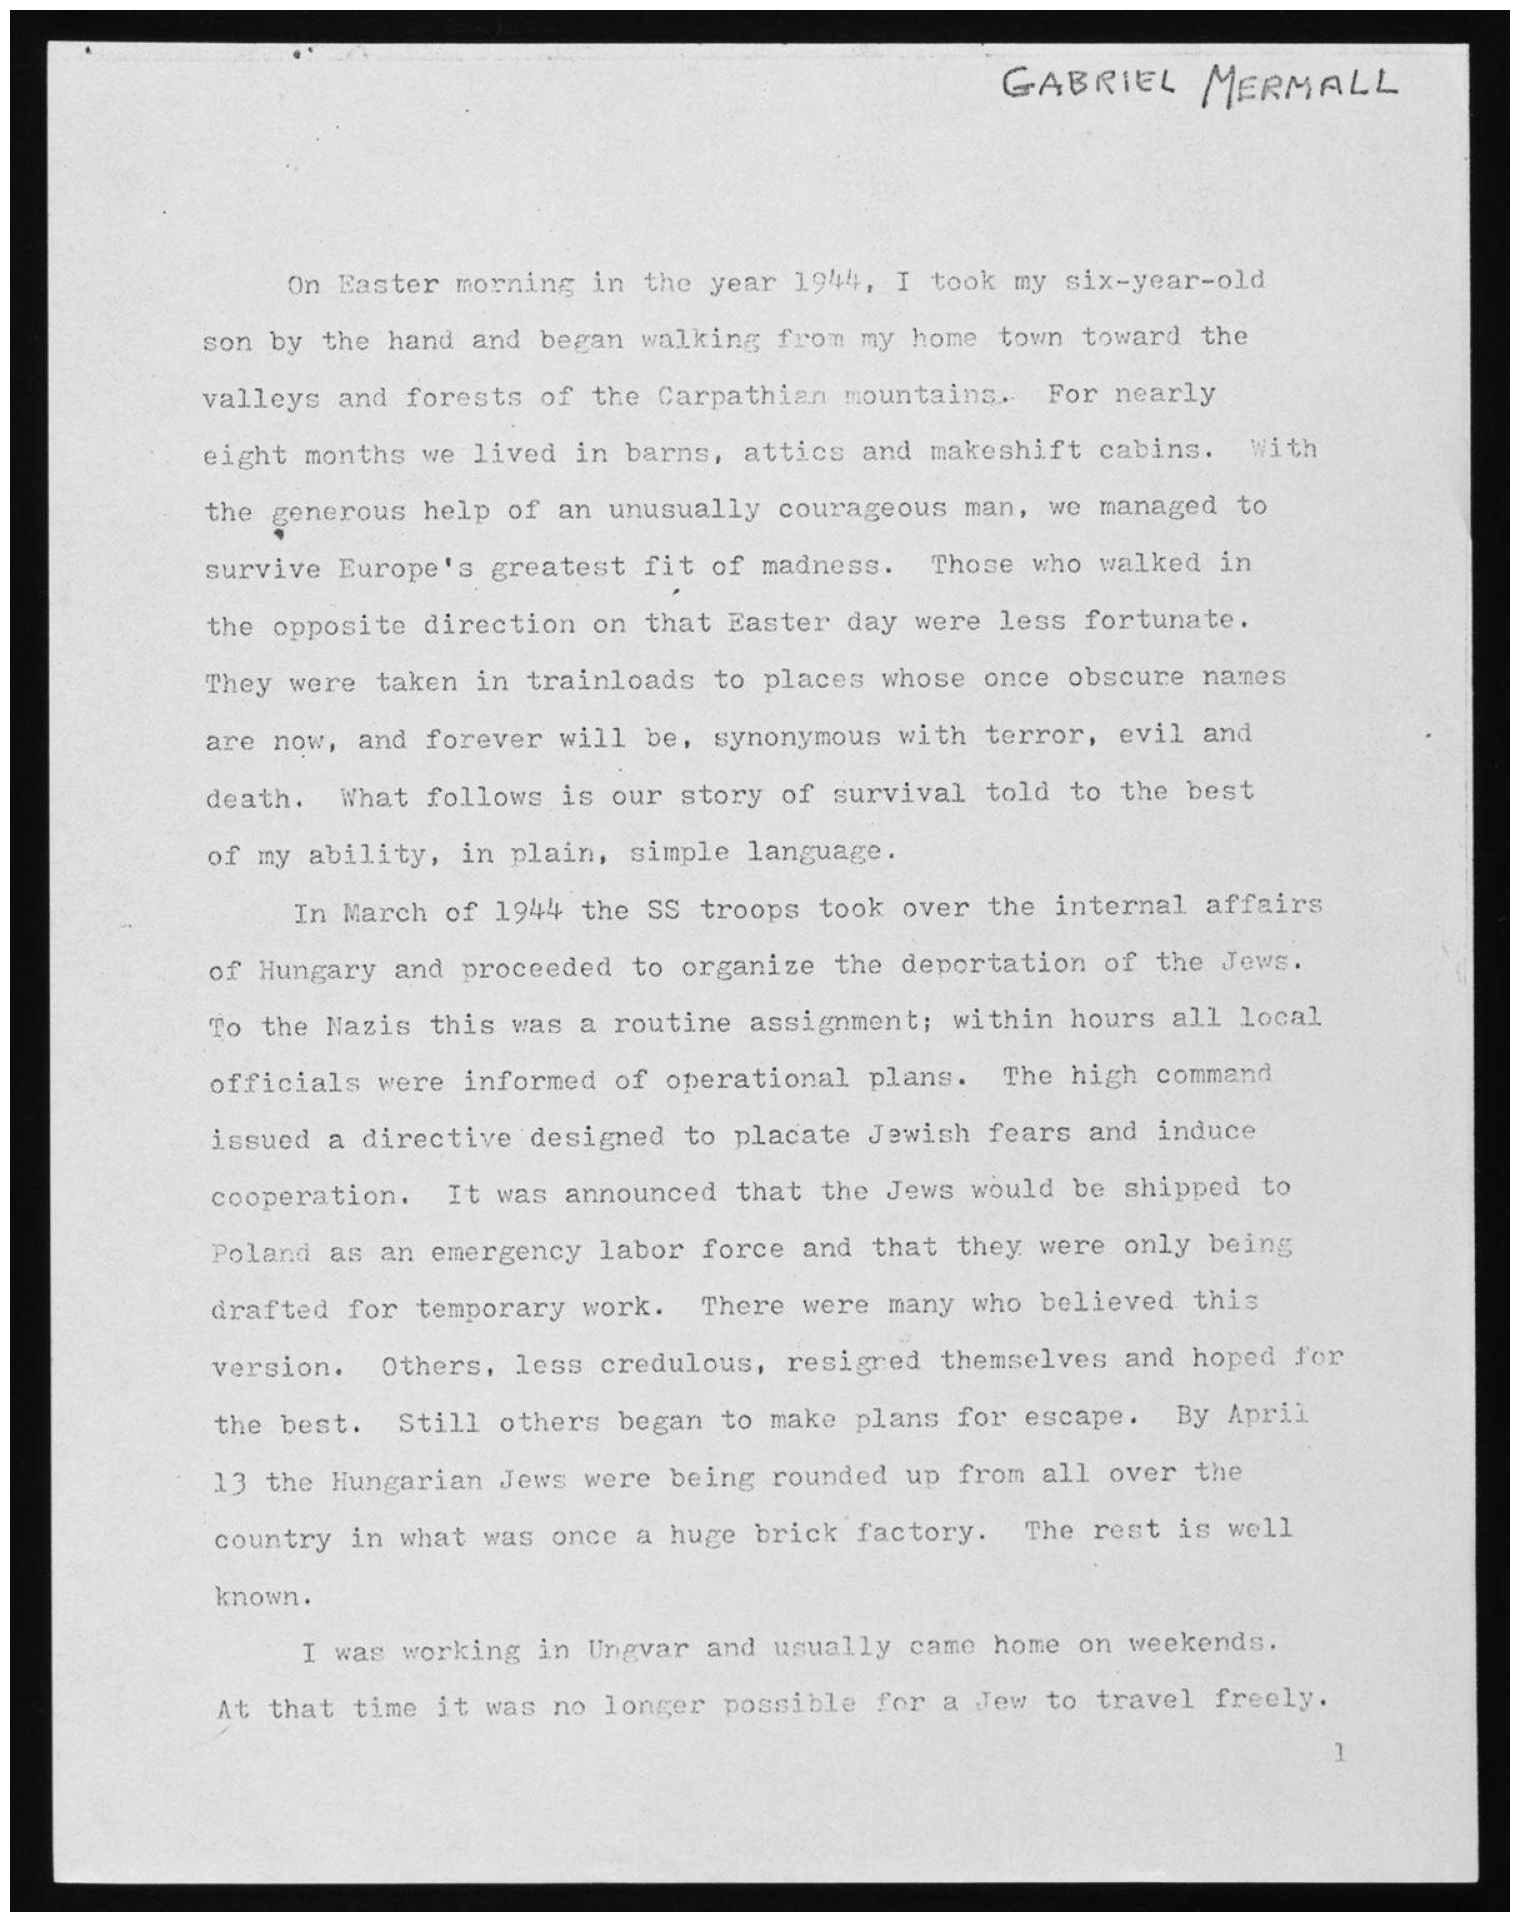

In [41]:
img_file=cv2.imread('data/page_01.jpg')


gray_image=grayscale(img_file)
cv2.imwrite('data/new_one-01.jpg',gray_image)

# showImg(img_file)
display('data/new_one-01.jpg')

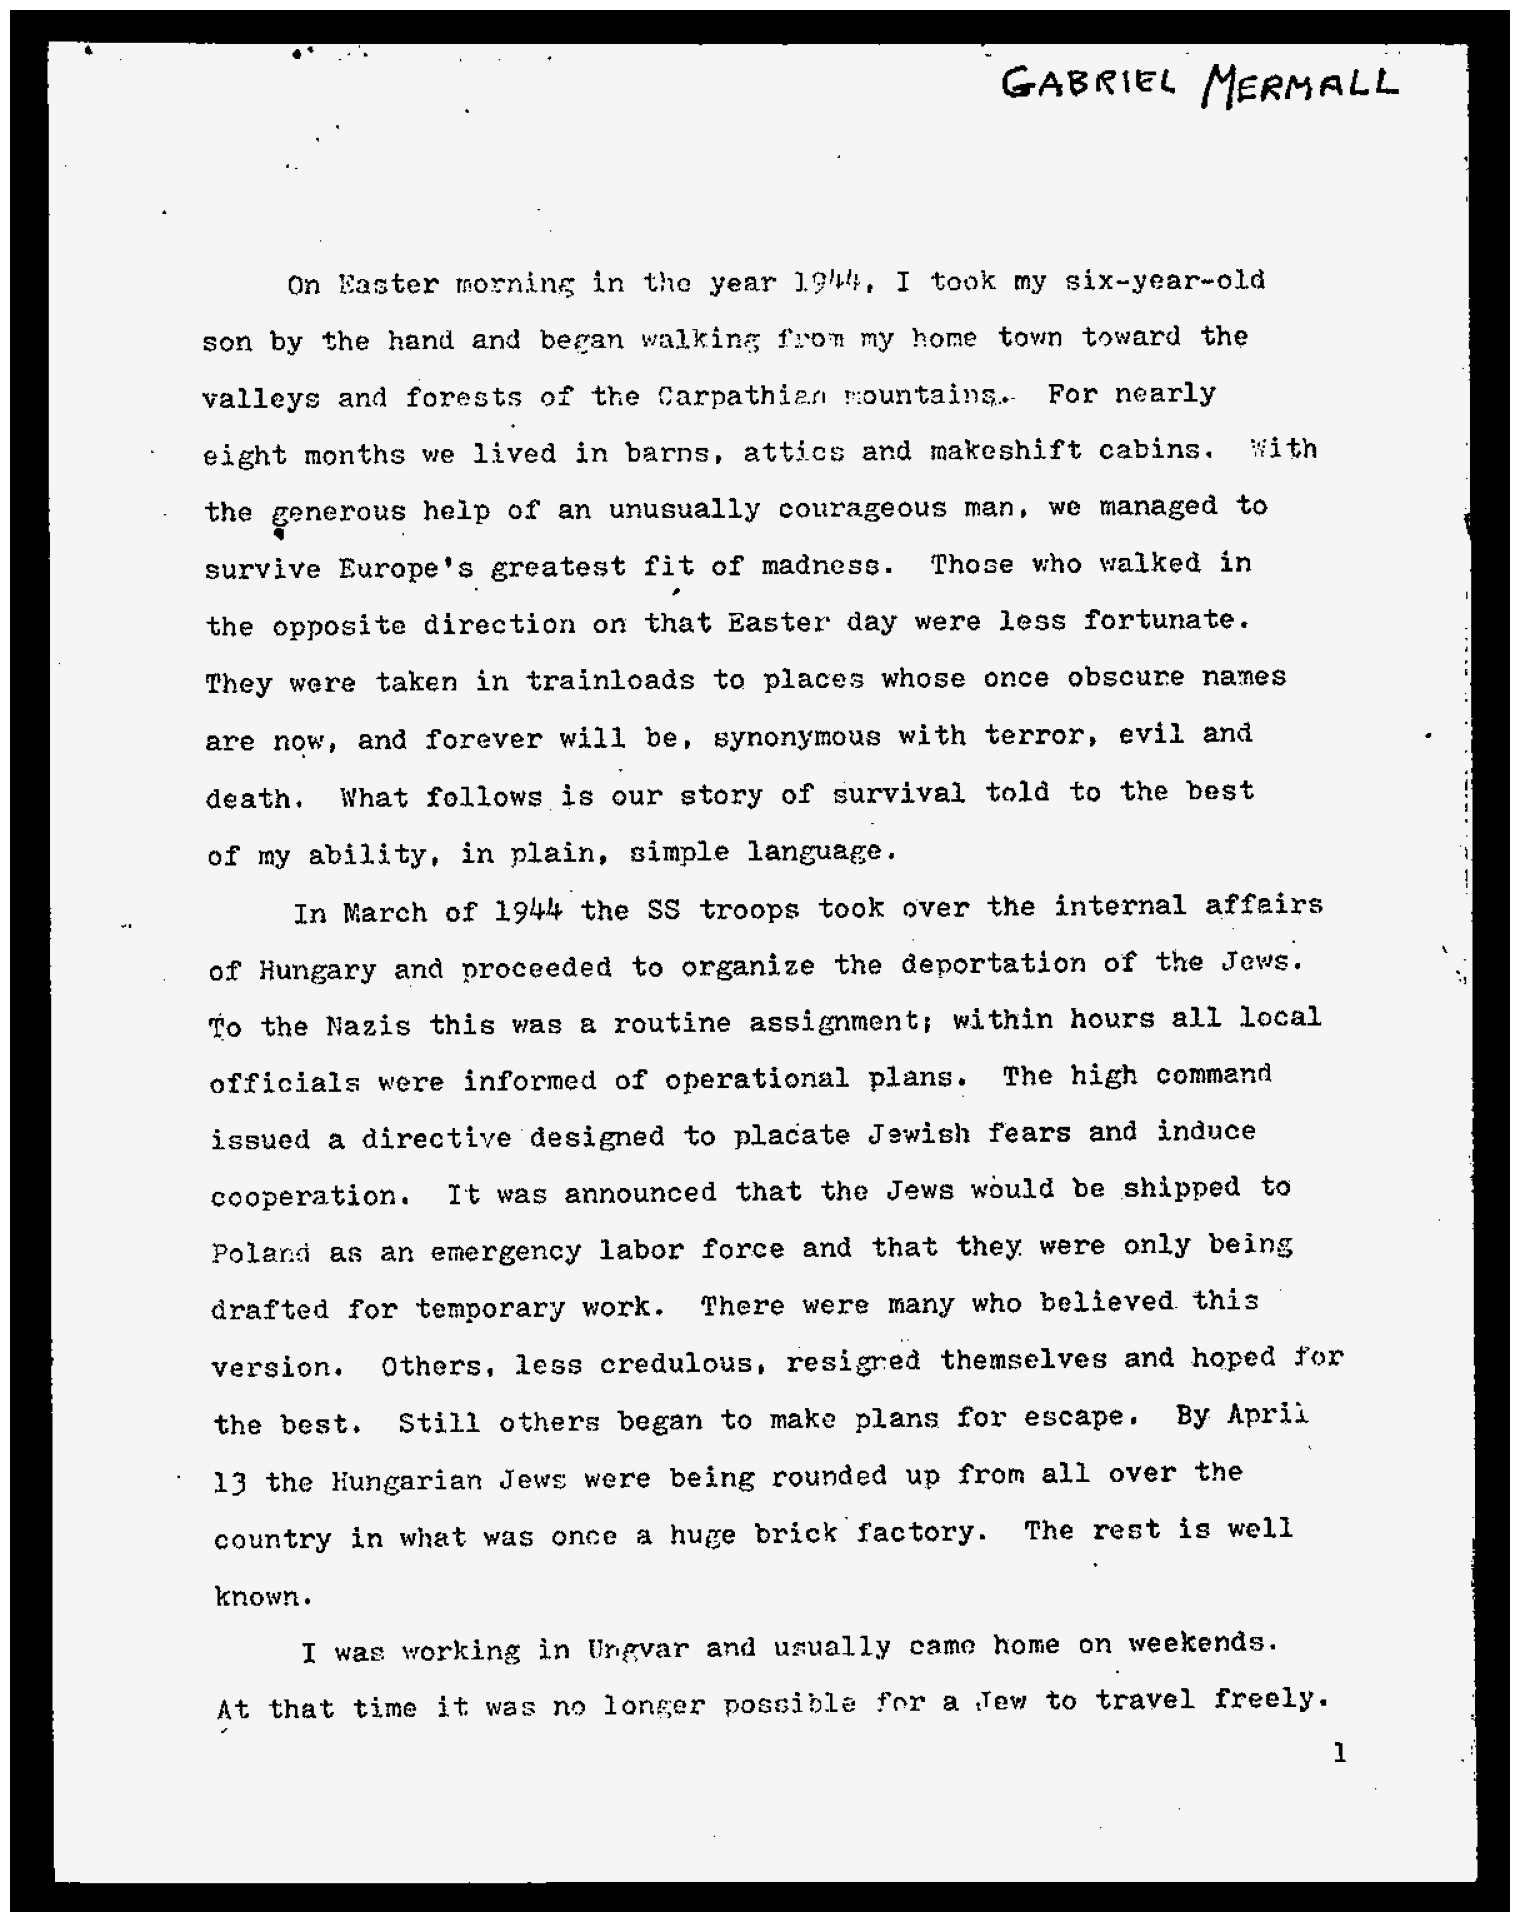

In [40]:
thresh,im_bw=cv2.threshold(gray_image,200,230,cv2.THRESH_BINARY)
cv2.imwrite('temp/bw_image.jpg',im_bw)

display('temp/bw_image.jpg')

 # Noise Remover

In [48]:
def noise_removal(image):
    import numpy as np
    kernal=np.ones((1,1),np.uint8)
    image=cv2.dilate(image, kernal, iterations=1)
    kernal=np.ones((1,1),np.uint8)
    image=cv2.erode(image, kernal, iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE, kernal)
    image=cv2.medianBlur(image,3)
    return(image)

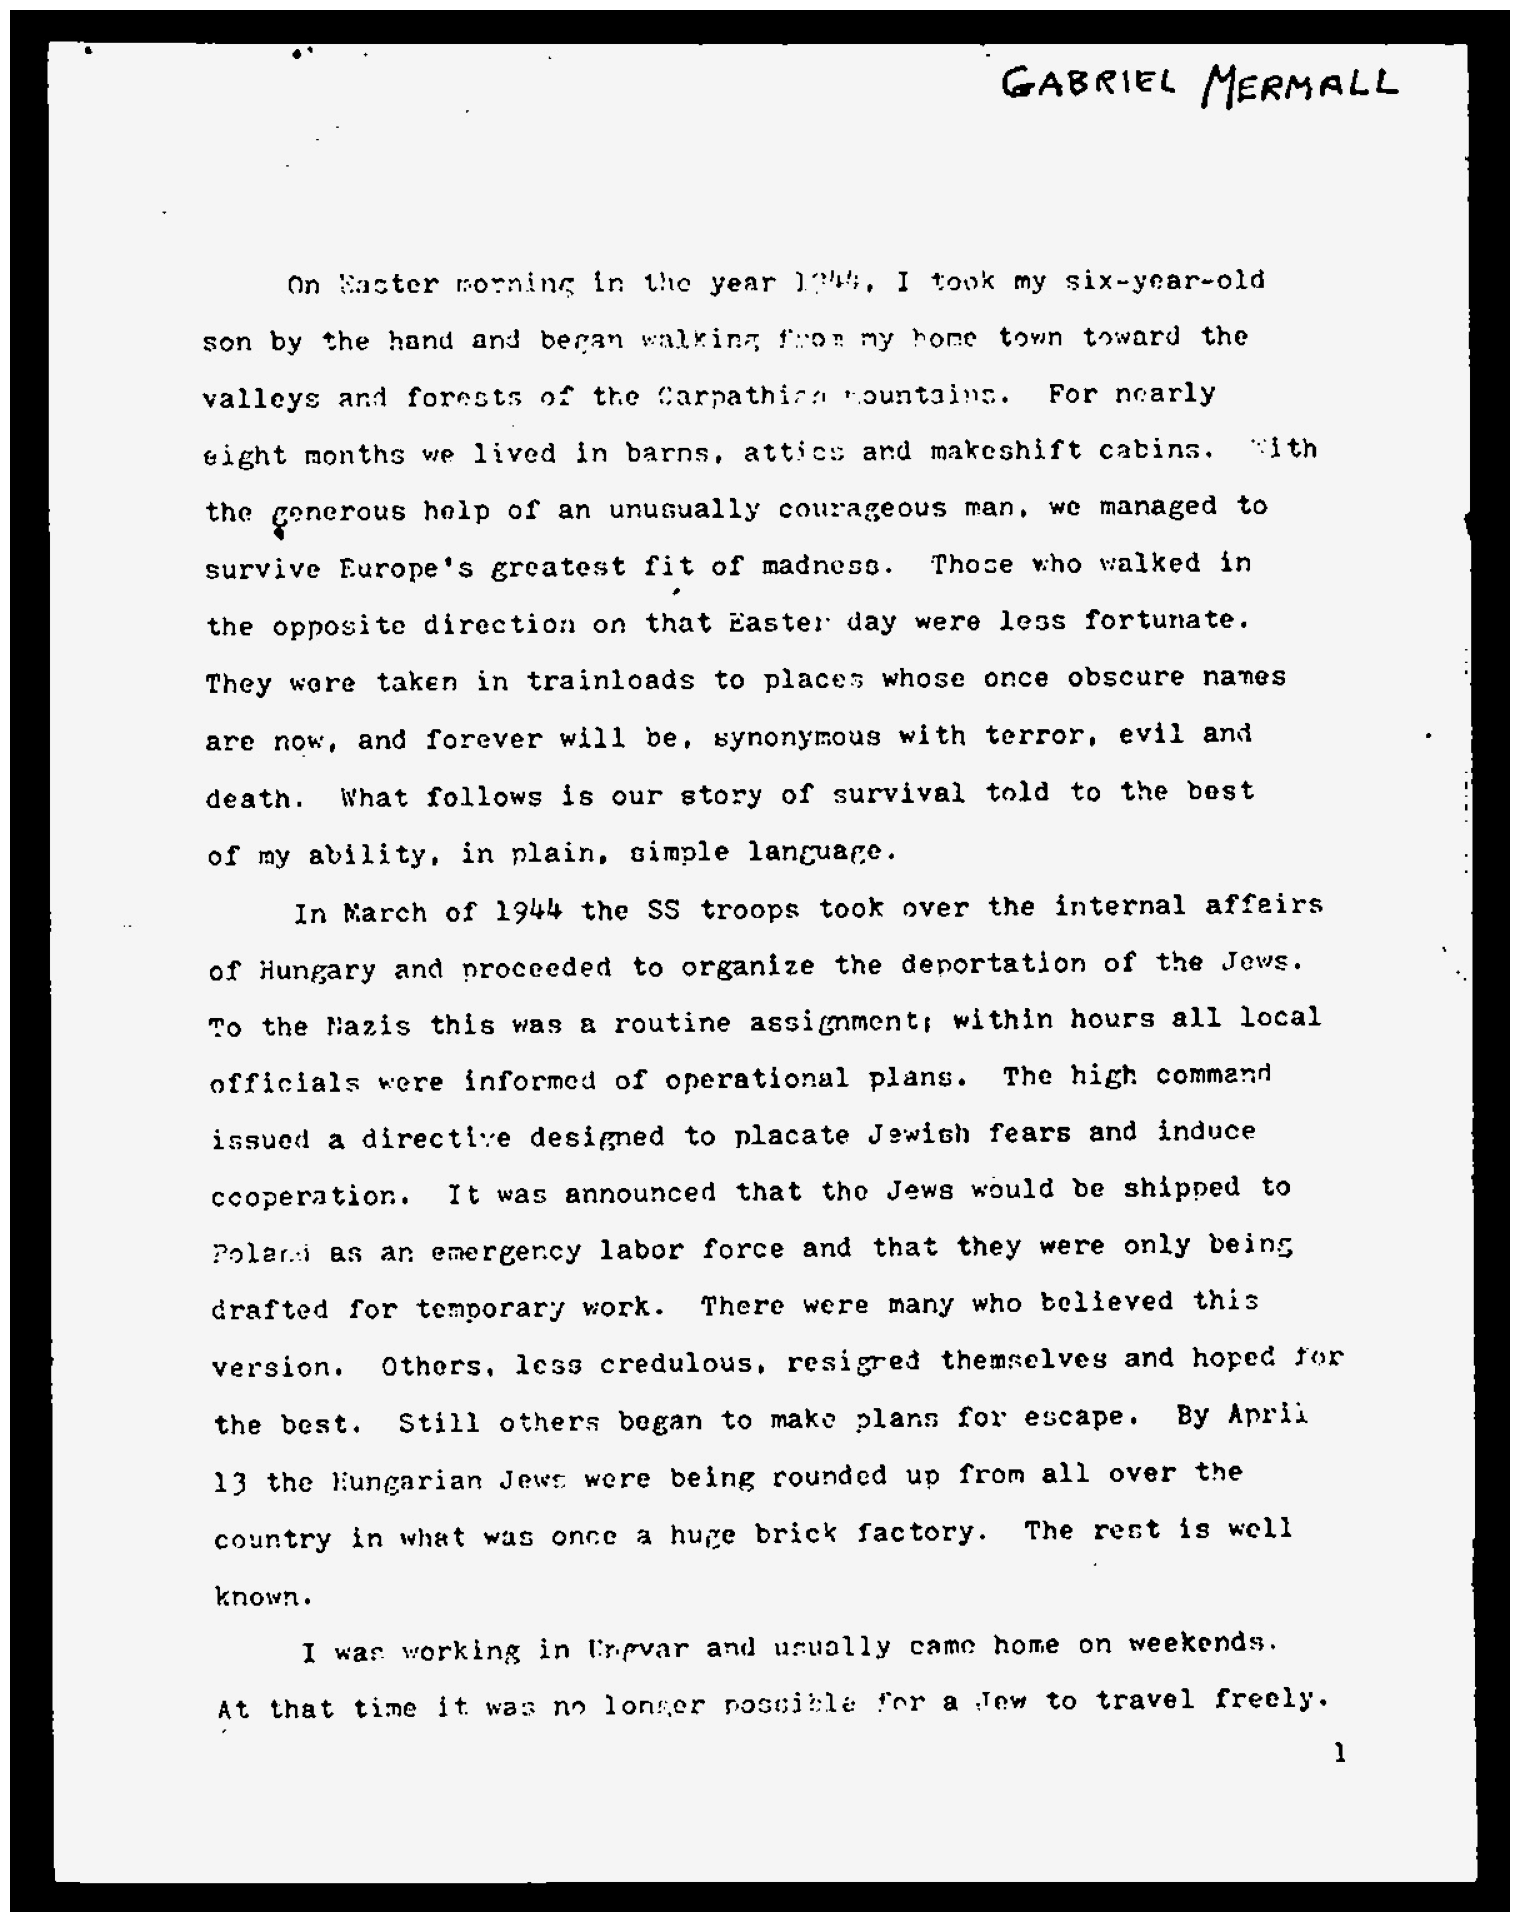

In [49]:
no_noise= noise_removal(im_bw)
cv2.imwrite('temp/no_noise.jpg', no_noise)

display('temp/no_noise.jpg')


 # Dilation nd Erosion

In [60]:
def thin_font(image):
    import numpy as np
#   image covert into B&W 
    image=cv2.bitwise_not(image) 
    kernal=np.ones((2,2),np.uint8)
#   thin the font( comes the pixels down)
    image=cv2.erode(image,kernal,iterations=1)
#   reconvert into Black font white background
    image=cv2.bitwise_not(image)
    return(image)

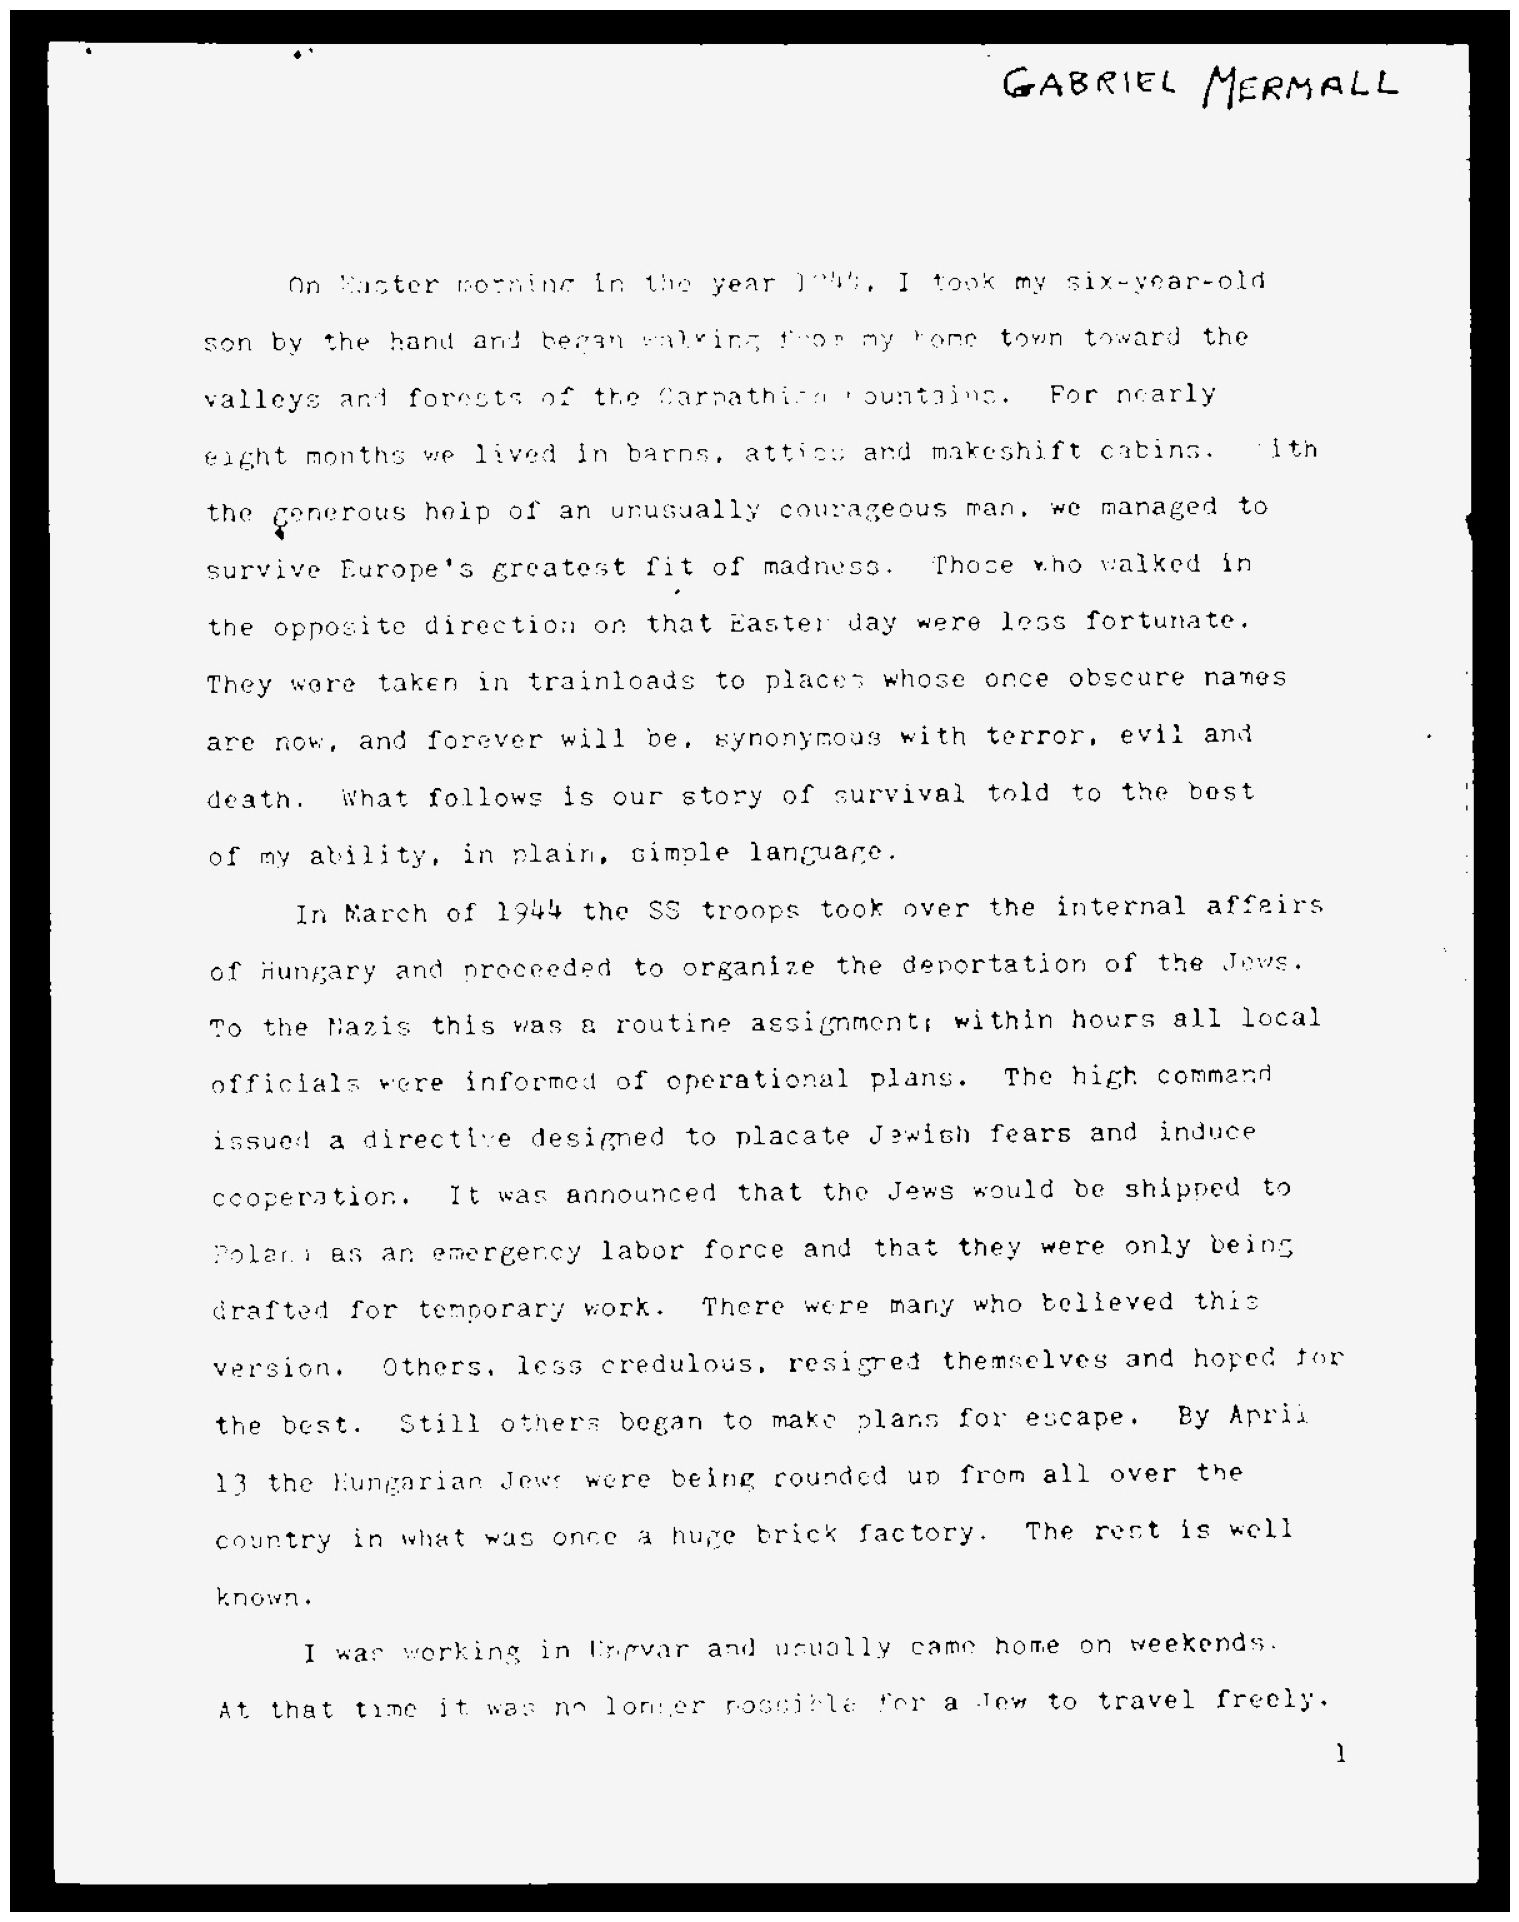

In [61]:
erode_image=thin_font(no_noise)
cv2.imwrite('temp/eroded_image.jpg', erode_image)

display('temp/eroded_image.jpg')

In [68]:
def thick_font(image):
    import numpy as np
#   image covert into B&W 
    image=cv2.bitwise_not(image) 
    kernal=np.ones((2,2),np.uint8)
#   thin the font( comes the pixels down)
    image=cv2.dilate(image,kernal,iterations=1)
#   reconvert into Black font white background
    image=cv2.bitwise_not(image)
    return(image)

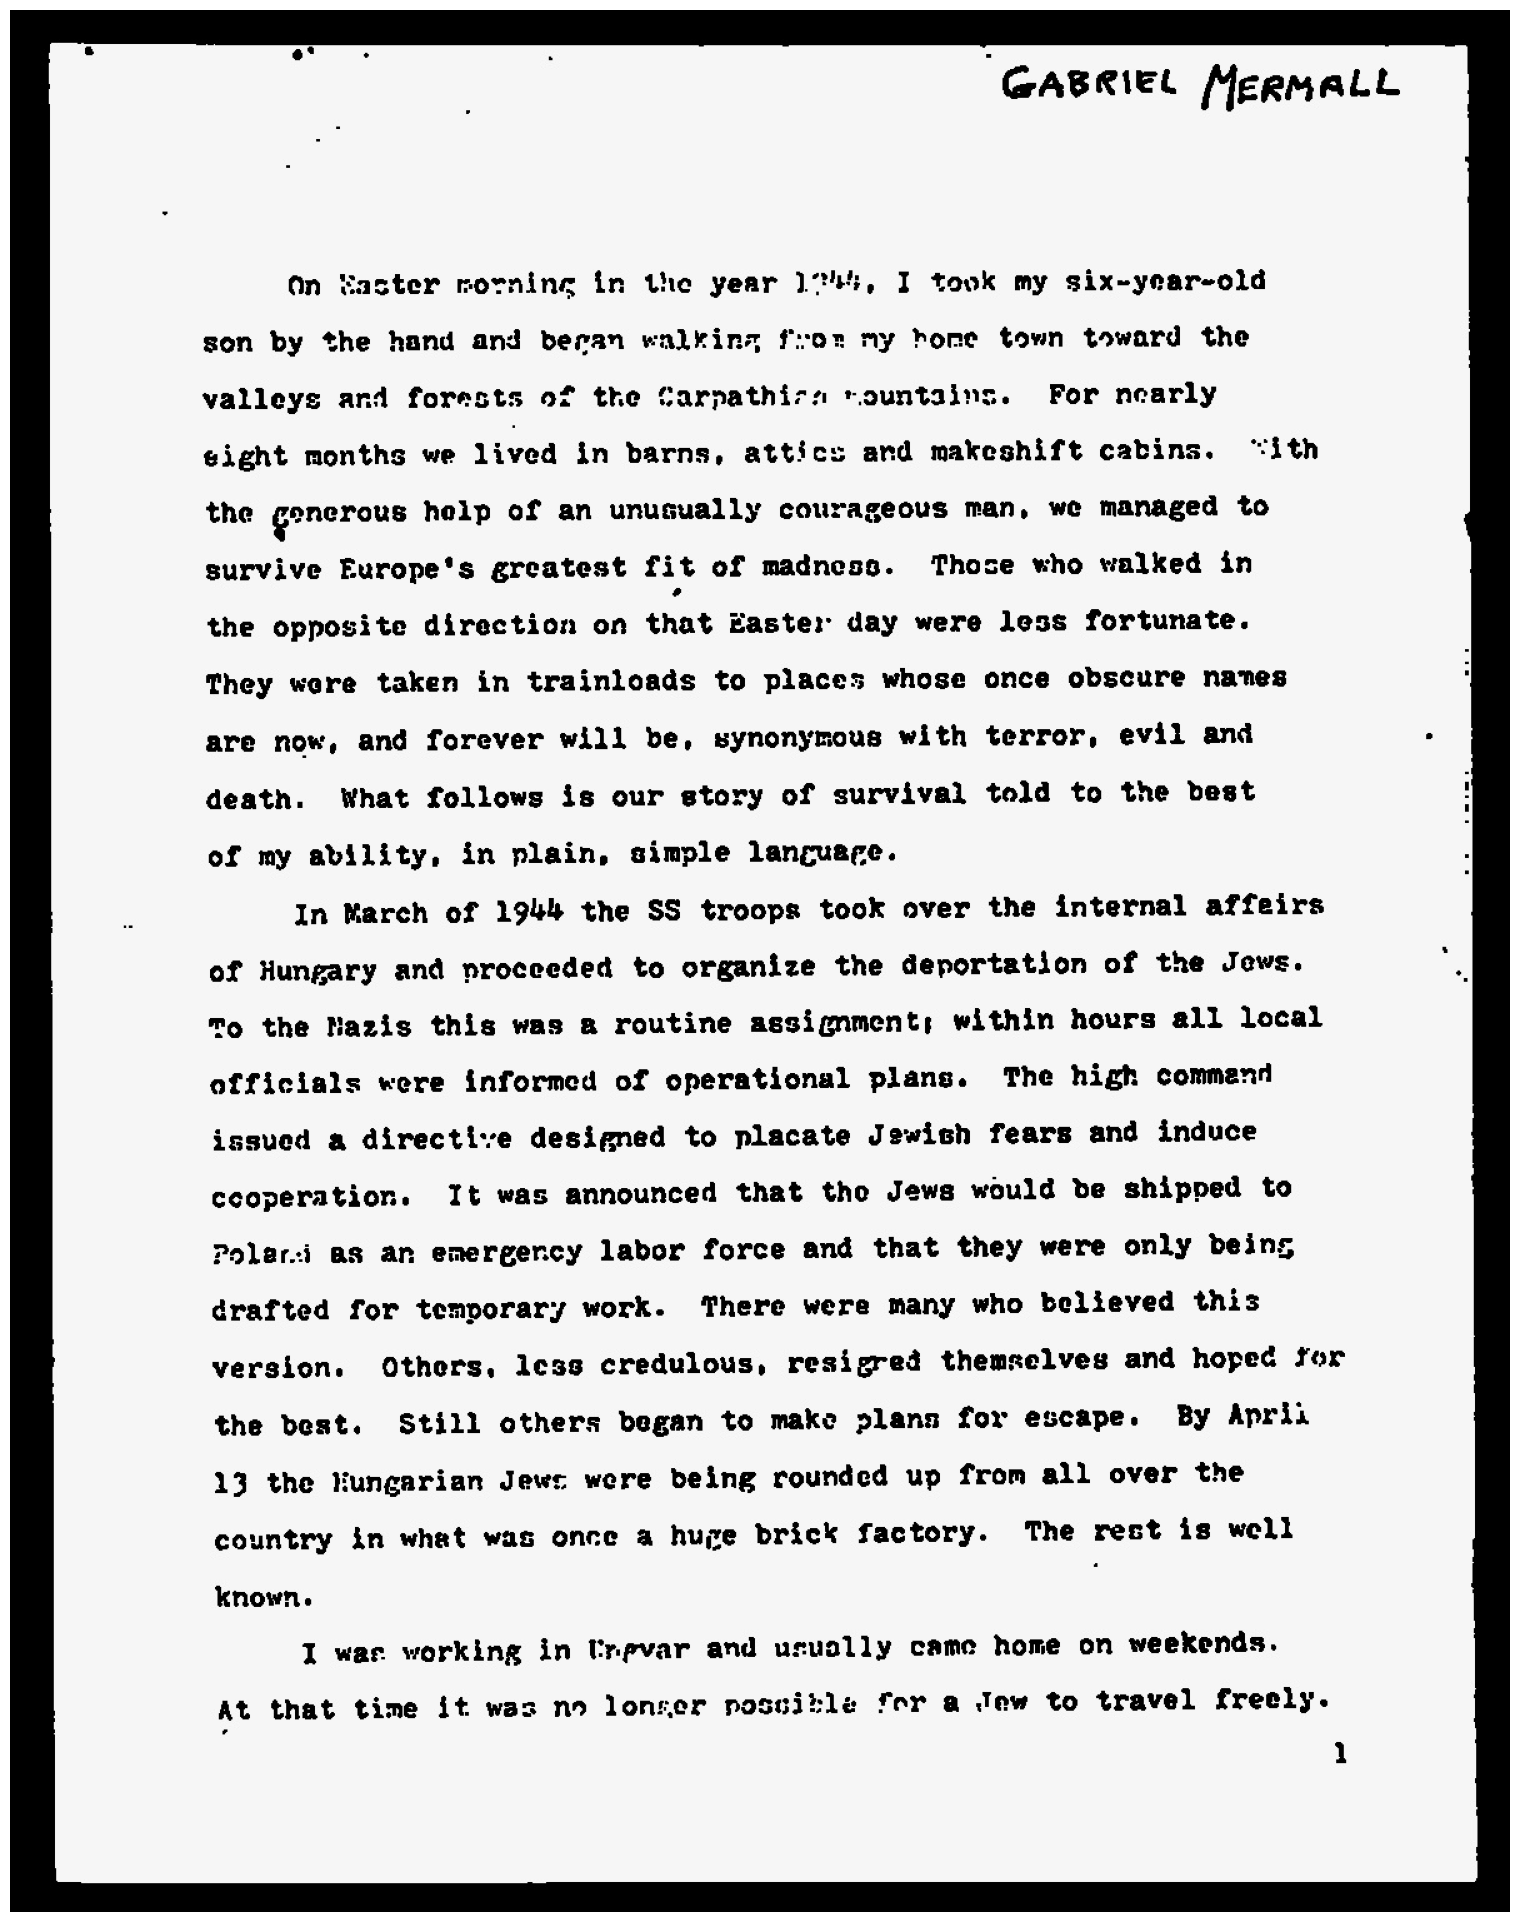

In [69]:
dilated_image= thick_font(no_noise)
cv2.imwrite('temp/dilated.jpg',dilated_image)

display('temp/dilated.jpg')